In [ ]:
# 라이브러리 로드
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # 학습, 테스트set 구분
import sklearn.metrics as mt 
from sklearn.model_selection import cross_val_score, cross_validate # 교차검증
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings('ignore')


# 랜덤포레스트

## 승차인원 예측

### 데이터 분리

In [ ]:
data1 = data

In [ ]:
data1.columns

Index(['ele_n', '5h30m', '6h', '6h30m', '7h', '7h30m', '8h', '8h30m', '9h',
       '9h30m', '10h', '10h30m', '11h', '11h30m', '12h', '12h30m', '13h',
       '13h30m', '14h', '14h30m', '15h', '15h30m', '16h', '16h30m', '17h',
       '17h30m', '18h', '18h30m', '19h', '19h30m', '20h', '20h30m', '21h',
       '21h30m', '22h', '22h30m', '23h', '23h30m', '24h', '24h30m', 'finedust',
       'co2', 'hcho', 'co', 'culture_', 'lift_', 'meeting_', 'transspace_',
       'biycle_', 'ele_', 'trainreserve_', 'issuer_', 'kiosk_', 'nursing_',
       'temp', 'wind', 'rain', 'popluation', 'line_1', 'line_2', 'line_3',
       'line_4', 'line_5', 'line_6', 'line_7', 'line_8', 'cluster_0',
       'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4', 'passenger'],
      dtype='object')

In [ ]:
x = data1[['ele_n', '5h30m', '6h', '6h30m', '7h', '7h30m', '8h',
       '8h30m', '9h', '9h30m', '10h', '10h30m', '11h', '11h30m', '12h',
       '12h30m', '13h', '13h30m', '14h', '14h30m', '15h', '15h30m', '16h',
       '16h30m', '17h', '17h30m', '18h', '18h30m', '19h', '19h30m', '20h',
       '20h30m', '21h', '21h30m', '22h', '22h30m', '23h', '23h30m', '24h',
       '24h30m', 'finedust', 'co2', 'hcho', 'co', 'culture_', 'lift_',
       'meeting_', 'transspace_', 'biycle_', 'ele_', 'trainreserve_',
       'issuer_', 'kiosk_', 'nursing_', 'temp', 'wind', 'rain', 'popluation',
       'line_1', 'line_2', 'line_3', 'line_4', 'line_5', 'line_6', 'line_7',
       'line_8', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3',
       'cluster_4']]

In [ ]:
y = data1['passenger']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 79 to 65
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ele_n          182 non-null    float64
 1   5h30m          182 non-null    float64
 2   6h             182 non-null    float64
 3   6h30m          182 non-null    float64
 4   7h             182 non-null    float64
 5   7h30m          182 non-null    float64
 6   8h             182 non-null    float64
 7   8h30m          182 non-null    float64
 8   9h             182 non-null    float64
 9   9h30m          182 non-null    float64
 10  10h            182 non-null    float64
 11  10h30m         182 non-null    float64
 12  11h            182 non-null    float64
 13  11h30m         182 non-null    float64
 14  12h            182 non-null    float64
 15  12h30m         182 non-null    float64
 16  13h            182 non-null    float64
 17  13h30m         182 non-null    float64
 18  14h       

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

In [ ]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시

    n_estimators  TrainScore  TestScore
0              5      0.9379     0.1824
1             10      0.9347     0.3088
2             15      0.9240     0.3528
3             20      0.9329     0.3828
4             25      0.9344     0.3969
5             30      0.9375     0.4104
6             35      0.9373     0.4032
7             40      0.9353     0.4237
8             45      0.9380     0.4269
9             50      0.9362     0.4426
10            55      0.9372     0.4499
11            60      0.9394     0.4461
12            65      0.9417     0.4455
13            70      0.9401     0.4408
14            75      0.9405     0.4399
15            80      0.9403     0.4483
16            85      0.9395     0.4543
17            90      0.9398     0.4557
18            95      0.9412     0.4448
19           100      0.9406     0.4427
20           105      0.9404     0.4451
21           110      0.9398     0.4434
22           115      0.9400     0.4458
23           120      0.9411     0.4406


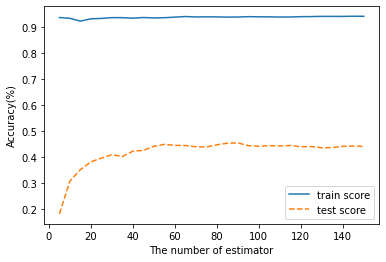

In [ ]:
algorithm = RandomForestRegressor
algorithm_name = 'RandomForestRegressor'

n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name, 
                 x_train, y_train, x_test, y_test, 
                 n_estimator_min, n_estimator_max)

n_estimator가 145개 일 때 train set에서 가장 좋은 성능을 냈으며
n_estimator가 90개 일 때 test set에서 가장 좋은 성능을 냈습니다.

In [ ]:
model1 =RandomForestRegressor(n_estimators=90, random_state=42)
model2= RandomForestRegressor(n_estimators=140, random_state=42)

model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

from sklearn.metrics import mean_squared_error
some_predicted1 = model1.predict(x_test)
some_predicted2 = model2.predict(x_test)
mse1 = np.sqrt(mean_squared_error(some_predicted1, y_test))
mse2 = np.sqrt(mean_squared_error(some_predicted2, y_test))
print('MSE1 score : ', mse1)
print('MSE score : ', mse2)

MSE1 score :  0.0876701105054897
MSE score :  0.08680816532667182


In [ ]:
from sklearn.metrics import mean_absolute_error

print('MAE score:', mean_absolute_error(y_test, some_predicted2))

MAE score: 0.06123511789957805


In [ ]:
scores = cross_val_score(model2, x, y, cv=5)
print(scores)
print(scores.mean())

[0.59434144 0.20890917 0.39701928 0.68174601 0.75541736]
0.5274866525693328


In [ ]:
skfold = StratifiedKFold(n_splits=3, shuffle = True, random_state=42) 
scores = cross_val_score(model2, x, y, cv=kfold)
print(scores) 
print(scores.mean())

[0.29820583 0.50039018 0.629801  ]
0.4761323352618832


In [ ]:
kfold = KFold(n_splits=5, shuffle = True, random_state=42) 
scores2 = cross_val_score(model2, x, y, cv=kfold)
print(scores2)
print(scores.mean())

[0.68759464 0.69199219 0.63329978 0.67185872 0.32189243]
0.4882875363870198


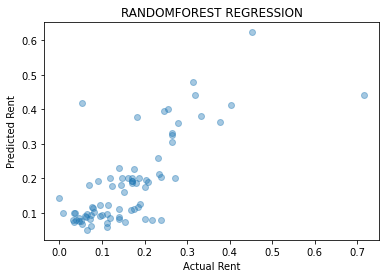

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, some_predicted2, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("RANDOMFOREST REGRESSION")
plt.show()

In [ ]:
trace = go.Scatter(y=model.feature_importances_,x=features,mode='markers',)

In [ ]:
relation_square = model.score(x, y)
print('결정계수 : ', relation_square)

결정계수 :  0.6675267722336343


- 선형회귀 성능 평가 지표
1. MSE score이 높을 수록 성능이 낮음,모델의 예측값과 실제값 차이의 제곱의 합
2. MAE score이 높을 수록 성능이 낮음,모델의 예측값과 실제값의 차이(절댓값)을 모두 더함

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error

다중공선성이 높은 변수들이 제거된 후 사용할 변수가 리턴된다

In [ ]:
def feature_engineering_XbyVIF(x_train, num_variables):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(x_train.values, i) 
                         for i in range(x_train.shape[1])]
    vif['Feature'] = x_train.columns
    X_colname_vif = vif.sort_values(by='VIF_Factor', ascending=True)['Feature'][:num_variables].values
    return X_colname_vif

In [ ]:
feature_engineering_XbyVIF(x, 5)

array(['trainreserve_', 'ele_', 'issuer_', 'kiosk_', 'meeting_'],
      dtype=object)

In [ ]:
x_train1 = x_train[['trainreserve_', 'ele_', 'issuer_', 'kiosk_', 'meeting_']]

In [ ]:
x_test1 = x_test[['trainreserve_', 'ele_', 'issuer_', 'kiosk_', 'meeting_']]

In [ ]:
model.fit(x_train1, y_train)
pre = model.predict(x_test1)
mse = np.sqrt(mean_squared_error(pre,  y_test))
print('MSE score:', mse)

MSE score: 0.12210746349388453


In [ ]:
from sklearn.metrics import mean_absolute_error
print('MAE score:', mean_absolute_error(y_test, pre))

MAE score: 0.0945524637172845


 kfold 교차검증

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 
scores = cross_val_score(model, x, y,  cv=kfold)
print(scores)
print(scores.mean())

[0.26649822 0.48193298 0.64038359 0.67560383 0.37701907]
0.4882875363870198


kfold결과 3번째 4번째 폴드에서 0.6이상의 정확도를 보였고 1,5번째 fold에서 0.4이하의 정확도를 보였습니다

In [ ]:
model.score(x_train1, y_train)

0.020125792582406987

In [ ]:
model.score(x_test1, y_test)

-0.16400781086888006

트레이닝 모델에서는 r-squared값이 0.3이상으로 좋은 성능을 보이지만 테스트 모델에서는r-squared값이 음수이므로 좋은 모델이 아님을 알 수 있었습니다.

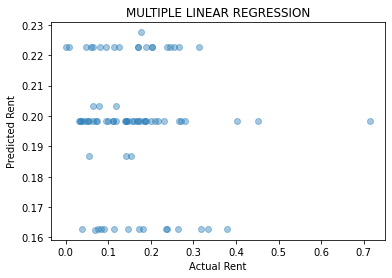

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, pre, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()